# MODEL - 3 Incorporating Numerical and Text Features

In [1]:
import pandas as pd

# Load datasets
numerical_data = pd.read_csv('cleaned_data.csv')
textual_data = pd.read_csv('cleaned_text.csv')

# Convert date columns to datetime and align formats
numerical_data['date'] = pd.to_datetime(numerical_data['date'], format='%Y-%m-%d')
textual_data['date'] = pd.to_datetime(textual_data['date'], format='%d-%m-%Y')

# Merge on date
merged_data = pd.merge(numerical_data, textual_data, on='date', how='left')

# Check for any NaN values in the text column (if any date in numerical_data is missing a corresponding text entry)
merged_data['text'].fillna('', inplace=True)

# Confirm the structure
print(merged_data.head())


        date  price   open   high    low      vol.  change %  \
0 2015-07-12  310.4  292.0  315.9  291.3  120700.0      6.33   
1 2015-07-13  290.4  310.4  310.9  276.9  146850.0     -6.47   
2 2015-07-14  287.0  290.4  297.0  285.2   60620.0     -1.17   
3 2015-07-15  283.4  287.0  292.9  283.2   59580.0     -1.23   
4 2015-07-16  276.6  283.4  290.8  273.3  121320.0     -2.41   

                                                text  
0  bitcoin the next logical step in the rise of u...  
1  bitgive foundation announces new initiatives a...  
2  keynote 2015  harnessing the distributed ledge...  
3  patrick byrne says   will be able to replace w...  
4  2015 q1 bitcoin investment trumps 2014 numbers...  


In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stop words if you haven't already (you can run this line once)
import nltk
nltk.download('stopwords')

# Initialize the stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization and stemming
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(stemmed_tokens)

# Apply the preprocess function to the text column
merged_data['processed_text'] = merged_data['text'].apply(preprocess_text)

# Confirm the changes
print(merged_data[['text', 'processed_text']].head())


[nltk_data] Downloading package stopwords to C:\Users\Sufiyan
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  bitcoin the next logical step in the rise of u...   
1  bitgive foundation announces new initiatives a...   
2  keynote 2015  harnessing the distributed ledge...   
3  patrick byrne says   will be able to replace w...   
4  2015 q1 bitcoin investment trumps 2014 numbers...   

                                      processed_text  
0  bitcoin next logic step rise unbank mobil paym...  
1  bitgiv foundat announc new initi insid bitcoin...  
2                keynot har distribut ledger bitcoin  
3    patrick byrn say abl replac wall street bitcoin  
4              q bitcoin invest trump number bitcoin  


In [3]:
# Implement TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_data['processed_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Confirm the shape and structure of the TF-IDF features
print(tfidf_df.head())


   accept  add  address  amp   announc  app  asset  ban  bank  base  ...  \
0     0.0  0.0      0.0  0.0  0.000000  0.0    0.0  0.0   0.0   0.0  ...   
1     0.0  0.0      0.0  0.0  0.718037  0.0    0.0  0.0   0.0   0.0  ...   
2     0.0  0.0      0.0  0.0  0.000000  0.0    0.0  0.0   0.0   0.0  ...   
3     0.0  0.0      0.0  0.0  0.000000  0.0    0.0  0.0   0.0   0.0  ...   
4     0.0  0.0      0.0  0.0  0.000000  0.0    0.0  0.0   0.0   0.0  ...   

   trader  transact  updat  use  user  volum  wallet  week  world  year  
0     0.0       0.0    0.0  0.0   0.0    0.0     0.0   0.0    0.0   0.0  
1     0.0       0.0    0.0  0.0   0.0    0.0     0.0   0.0    0.0   0.0  
2     0.0       0.0    0.0  0.0   0.0    0.0     0.0   0.0    0.0   0.0  
3     0.0       0.0    0.0  0.0   0.0    0.0     0.0   0.0    0.0   0.0  
4     0.0       0.0    0.0  0.0   0.0    0.0     0.0   0.0    0.0   0.0  

[5 rows x 100 columns]


In [4]:
# Combine the TF-IDF features with the original merged DataFrame
final_data = pd.concat([merged_data.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Confirm the final structure
print(final_data.head())


        date  price   open   high    low      vol.  change %  \
0 2015-07-12  310.4  292.0  315.9  291.3  120700.0      6.33   
1 2015-07-13  290.4  310.4  310.9  276.9  146850.0     -6.47   
2 2015-07-14  287.0  290.4  297.0  285.2   60620.0     -1.17   
3 2015-07-15  283.4  287.0  292.9  283.2   59580.0     -1.23   
4 2015-07-16  276.6  283.4  290.8  273.3  121320.0     -2.41   

                                                text  \
0  bitcoin the next logical step in the rise of u...   
1  bitgive foundation announces new initiatives a...   
2  keynote 2015  harnessing the distributed ledge...   
3  patrick byrne says   will be able to replace w...   
4  2015 q1 bitcoin investment trumps 2014 numbers...   

                                      processed_text  accept  ...  trader  \
0  bitcoin next logic step rise unbank mobil paym...     0.0  ...     0.0   
1  bitgiv foundat announc new initi insid bitcoin...     0.0  ...     0.0   
2                keynot har distribut ledger bi

In [5]:
# Define the target variable and features
target = final_data['price']
features = final_data.drop(columns=['date', 'price', 'text', 'processed_text'])  # Drop irrelevant columns


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Confirm the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (1716, 104)
Testing Features Shape: (430, 104)
Training Target Shape: (1716, 2)
Testing Target Shape: (430, 2)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 71.65732122607702


# USING BERT MODEL

In [11]:
import pandas as pd
import re
import torch
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from transformers import BertTokenizer, BertModel

# Load datasets
start_time = time.time()  # Start timing
numerical_data = pd.read_csv('cleaned_data.csv')
textual_data = pd.read_csv('cleaned_text.csv')
load_time = time.time() - start_time  # End timing
print(f"Time taken to load datasets: {load_time:.2f} seconds")

# Convert date columns to datetime and align formats
start_time = time.time()
numerical_data['date'] = pd.to_datetime(numerical_data['date'], format='%Y-%m-%d')
textual_data['date'] = pd.to_datetime(textual_data['date'], format='%d-%m-%Y')
convert_time = time.time() - start_time
print(f"Time taken to convert date columns: {convert_time:.2f} seconds")

# Merge on date
start_time = time.time()
merged_data = pd.merge(numerical_data, textual_data, on='date', how='left')
merge_time = time.time() - start_time
print(f"Time taken to merge datasets: {merge_time:.2f} seconds")

# Check for any NaN values in the text column
merged_data['text'].fillna('', inplace=True)

# Preprocess text data
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(stemmed_tokens)

start_time = time.time()
merged_data['processed_text'] = merged_data['text'].apply(preprocess_text)
preprocess_time = time.time() - start_time
print(f"Time taken to preprocess text: {preprocess_time:.2f} seconds")

# Load BERT model and tokenizer
start_time = time.time()
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)
load_bert_time = time.time() - start_time
print(f"Time taken to load BERT model: {load_bert_time:.2f} seconds")

# Tokenize the processed text
def tokenize_texts(texts):
    inputs = tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        return_tensors='pt',
        max_length=512
    )
    return inputs

start_time = time.time()
tokenized_inputs = tokenize_texts(merged_data['processed_text'])
tokenize_time = time.time() - start_time
print(f"Time taken to tokenize text: {tokenize_time:.2f} seconds")

# Extract BERT features
def extract_bert_features(tokenized_inputs):
    with torch.no_grad():
        outputs = bert_model(**tokenized_inputs)
    return outputs.last_hidden_state.mean(dim=1)

start_time = time.time()
bert_features = extract_bert_features(tokenized_inputs)
bert_time = time.time() - start_time
print(f"Time taken to extract BERT features: {bert_time:.2f} seconds")

# Convert BERT features to a DataFrame
bert_df = pd.DataFrame(bert_features.numpy())

# Combine BERT features with the numerical features
final_data = pd.concat([merged_data.reset_index(drop=True), bert_df.reset_index(drop=True)], axis=1)

# Define the target variable and features
target = final_data['price']
features = final_data.drop(columns=['date', 'price', 'text', 'processed_text'])

# Convert column names to strings to avoid TypeError
features.columns = features.columns.astype(str)

# Train-test split
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
split_time = time.time() - start_time
print(f"Time taken to split data: {split_time:.2f} seconds")

# Train Random Forest Regressor
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Time taken to train Random Forest model: {train_time:.2f} seconds")

# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start_time
print(f"Time taken to make predictions: {predict_time:.2f} seconds")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Time taken to load datasets: 0.05 seconds
Time taken to convert date columns: 0.03 seconds
Time taken to merge datasets: 0.02 seconds


[nltk_data] Downloading package stopwords to C:\Users\Sufiyan
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Time taken to preprocess text: 0.53 seconds
Time taken to load BERT model: 1.78 seconds
Time taken to tokenize text: 0.78 seconds
Time taken to extract BERT features: 133.25 seconds
Time taken to split data: 0.03 seconds
Time taken to train Random Forest model: 139.75 seconds
Time taken to make predictions: 0.04 seconds
Mean Absolute Error: 184.57441627906974


In [12]:
# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start_time
print(f"Time taken to make predictions: {predict_time:.2f} seconds")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Create a DataFrame for actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Include a few features for better understanding (you can customize this)
# Select some feature columns to display (for example, first 5 features)
feature_columns = X_test.columns[:5]  # Change the slice as needed
predictions_df = pd.concat([predictions_df, X_test[feature_columns].reset_index(drop=True)], axis=1)

# Display the predictions DataFrame
print(predictions_df.head())


Time taken to make predictions: 0.05 seconds
Mean Absolute Error: 184.57441627906974
      Actual Price  Predicted Price     open     high     low      vol.  \
1761        9318.0         9440.458      NaN      NaN     NaN       NaN   
2029       38852.9        37188.190      NaN      NaN     NaN       NaN   
128          322.8          321.443   3626.3   3627.9  3575.7  488160.0   
332          761.2          726.769  11244.5  11277.2  9917.7  264720.0   
1091        6362.9         6322.319      NaN      NaN     NaN       NaN   

      change %  
1761       NaN  
2029       NaN  
128      -0.57  
332      -9.59  
1091       NaN  


Time taken to make predictions: 0.04 seconds
Mean Absolute Error: 184.57441627906974
      Actual Price  Predicted Price     open     high     low      vol.  \
1761        9318.0         9440.458      NaN      NaN     NaN       NaN   
2029       38852.9        37188.190      NaN      NaN     NaN       NaN   
128          322.8          321.443   3626.3   3627.9  3575.7  488160.0   
332          761.2          726.769  11244.5  11277.2  9917.7  264720.0   
1091        6362.9         6322.319      NaN      NaN     NaN       NaN   

      change %  
1761       NaN  
2029       NaN  
128      -0.57  
332      -9.59  
1091       NaN  


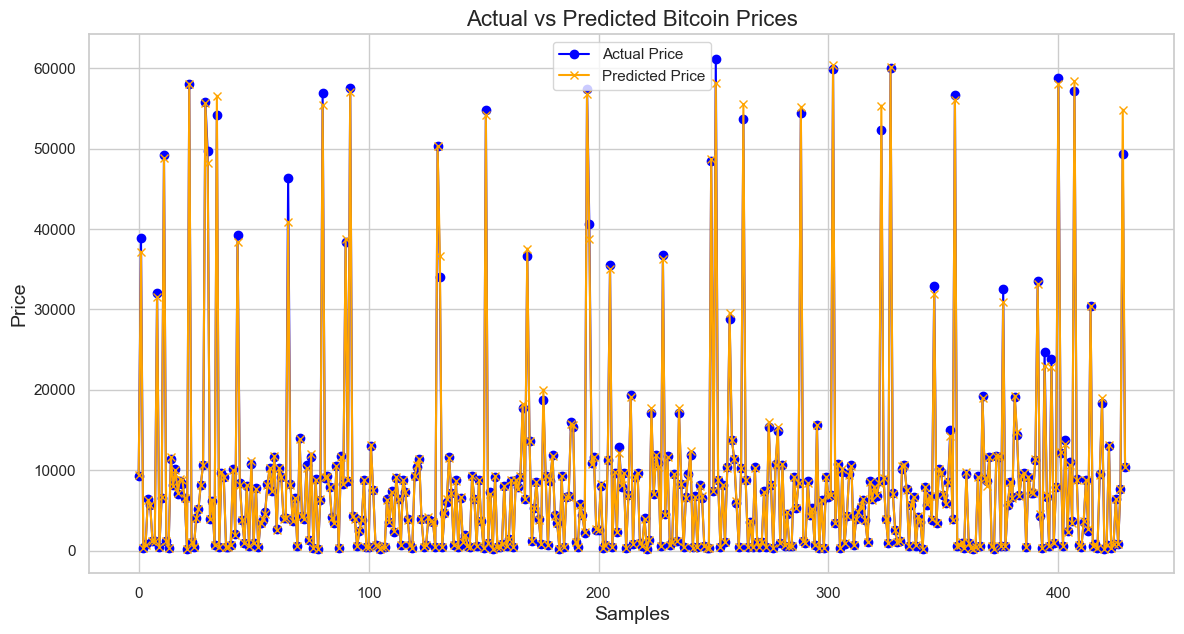

In [13]:
# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start_time
print(f"Time taken to make predictions: {predict_time:.2f} seconds")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Create a DataFrame for actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Include a few features for better understanding (you can customize this)
# Select some feature columns to display (for example, first 5 features)
feature_columns = X_test.columns[:5]  # Change the slice as needed
predictions_df = pd.concat([predictions_df, X_test[feature_columns].reset_index(drop=True)], axis=1)

# Display the predictions DataFrame
print(predictions_df.head())

# Plot Actual vs Predicted Prices
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a line plot for Actual vs Predicted prices
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Actual Price'].values, label='Actual Price', color='blue', marker='o')
plt.plot(predictions_df['Predicted Price'].values, label='Predicted Price', color='orange', marker='x')

# Add labels and title
plt.title('Actual vs Predicted Bitcoin Prices', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show()


Data Diagnostics:
Price range in training data:
Min price: $211.40
Max price: $63,540.90
Mean price: $8,649.91

Feature Statistics:
               open          high           low          vol.     change %  \
count   2146.000000   2146.000000   2146.000000  2.146000e+03  2146.000000   
mean    8632.001165   8896.109925   8336.822973  5.160116e+05     0.303504   
std    12055.215223  12454.354964  11588.466405  1.311607e+06     3.975095   
min      211.400000    226.600000    196.300000  2.400000e+03   -39.180000   
25%      894.600000    914.700000    871.800000  6.817250e+04    -1.180000   
50%     6391.000000   6528.800000   6278.900000  1.446900e+05     0.210000   
75%     9568.525000   9750.700000   9325.050000  5.157025e+05     1.817500   
max    63544.200000  64778.000000  62067.500000  2.026000e+07    25.560000   

                 0            1            2            3            4  ...  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  ...   
mean   

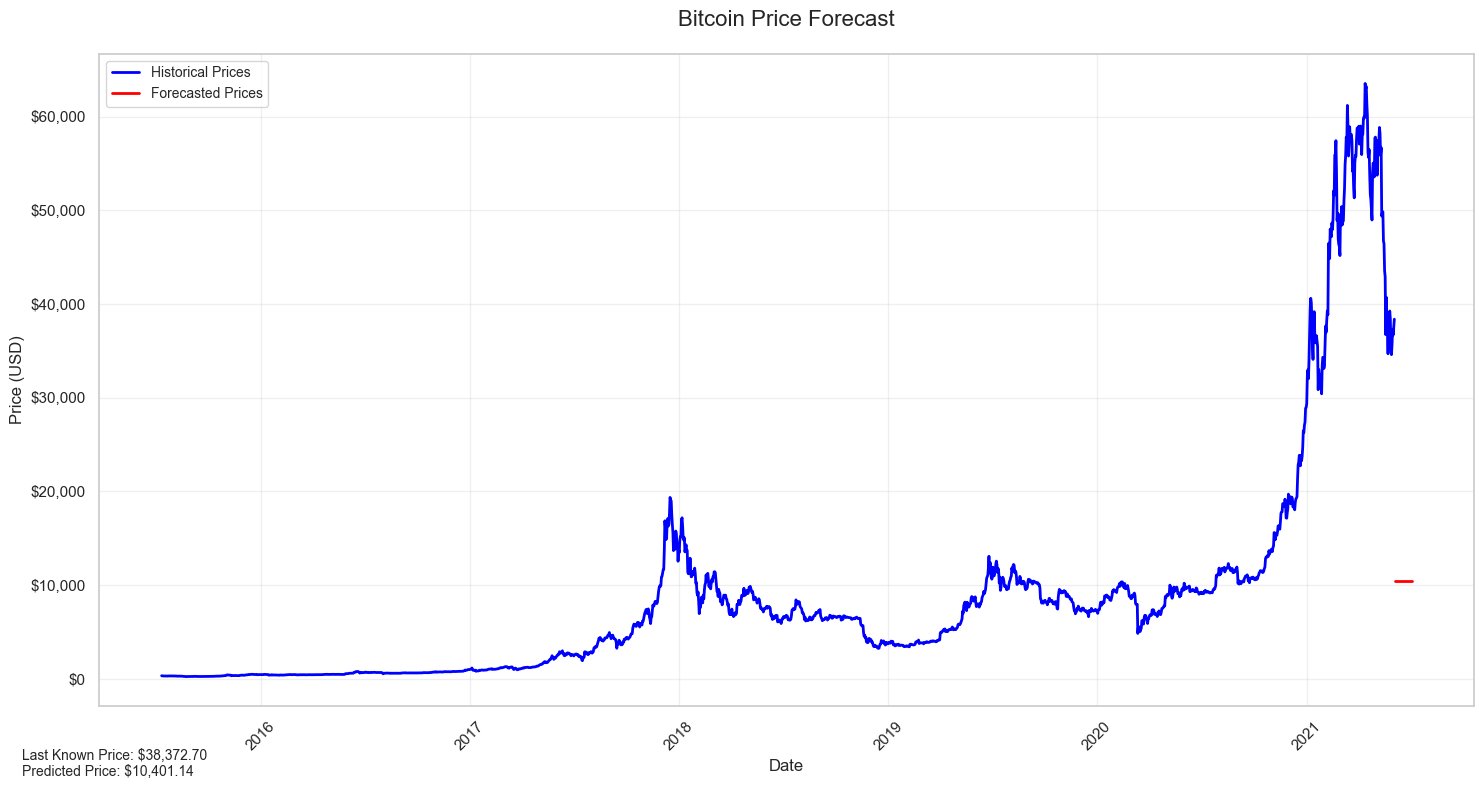

In [21]:
# 1. First, let's add some diagnostic code to check our data
print("Data Diagnostics:")
print("Price range in training data:")
print(f"Min price: ${numerical_data['price'].min():,.2f}")
print(f"Max price: ${numerical_data['price'].max():,.2f}")
print(f"Mean price: ${numerical_data['price'].mean():,.2f}")

# 2. Check for any extreme values or outliers in features
print("\nFeature Statistics:")
print(features.describe())

# 3. Add data scaling for price and numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a modified version of your existing code with scaling:
# Create scalers
price_scaler = MinMaxScaler()
feature_scaler = StandardScaler()

# Scale the price data
price_scaled = price_scaler.fit_transform(target.values.reshape(-1, 1))

# Scale the features (excluding BERT features which are already normalized)
# Assuming the first few columns are numerical features and rest are BERT
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
bert_columns = features.columns.difference(numerical_columns)

features_scaled = features.copy()
features_scaled[numerical_columns] = feature_scaler.fit_transform(features[numerical_columns])

# Split the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    features_scaled, price_scaled, test_size=0.2, random_state=42
)

# Train the model with scaled data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions and inverse transform to get actual prices
y_pred_scaled = model.predict(X_test_scaled)
y_pred = price_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test = price_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Calculate MAE on actual prices
mae = mean_absolute_error(y_test, y_pred)
print(f"\nNew MAE: ${mae:,.2f}")

# Modified plotting code with scaled predictions
def plot_bitcoin_forecast(model, last_features, dates, prices, price_scaler, feature_scaler, days_to_predict=30):
    # Generate future dates
    last_date = dates.max()
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=days_to_predict, freq='D')
    
    # Prepare future features
    future_features = pd.concat([last_features] * days_to_predict, ignore_index=True)
    
    # Scale future features
    future_features[numerical_columns] = feature_scaler.transform(future_features[numerical_columns])
    
    # Generate and inverse transform predictions
    future_pred_scaled = model.predict(future_features)
    future_predictions = price_scaler.inverse_transform(future_pred_scaled.reshape(-1, 1)).ravel()
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    
    # Plot historical prices
    plt.plot(dates, prices, label='Historical Prices', color='blue', linewidth=2)
    
    # Plot forecasted prices
    plt.plot(future_dates, future_predictions, label='Forecasted Prices', color='red', linewidth=2)
    
    # Customize the plot
    plt.title('Bitcoin Price Forecast', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Format axes
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x):,}'))
    plt.xticks(rotation=45)
    
    # Add price information
    last_price = prices.iloc[-1]
    final_prediction = future_predictions[-1]
    summary_text = f'Last Known Price: ${last_price:,.2f}\nPredicted Price: ${final_prediction:,.2f}'
    plt.figtext(0.02, 0.02, summary_text, fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return plt, future_predictions

# Use the modified plotting function
plt, future_pred = plot_bitcoin_forecast(
    model,
    X_test.iloc[-1:],
    numerical_data['date'],
    numerical_data['price'],
    price_scaler,
    feature_scaler
)
plt.show()

# FINAL PREDICTION

Mean Absolute Error: $179.90


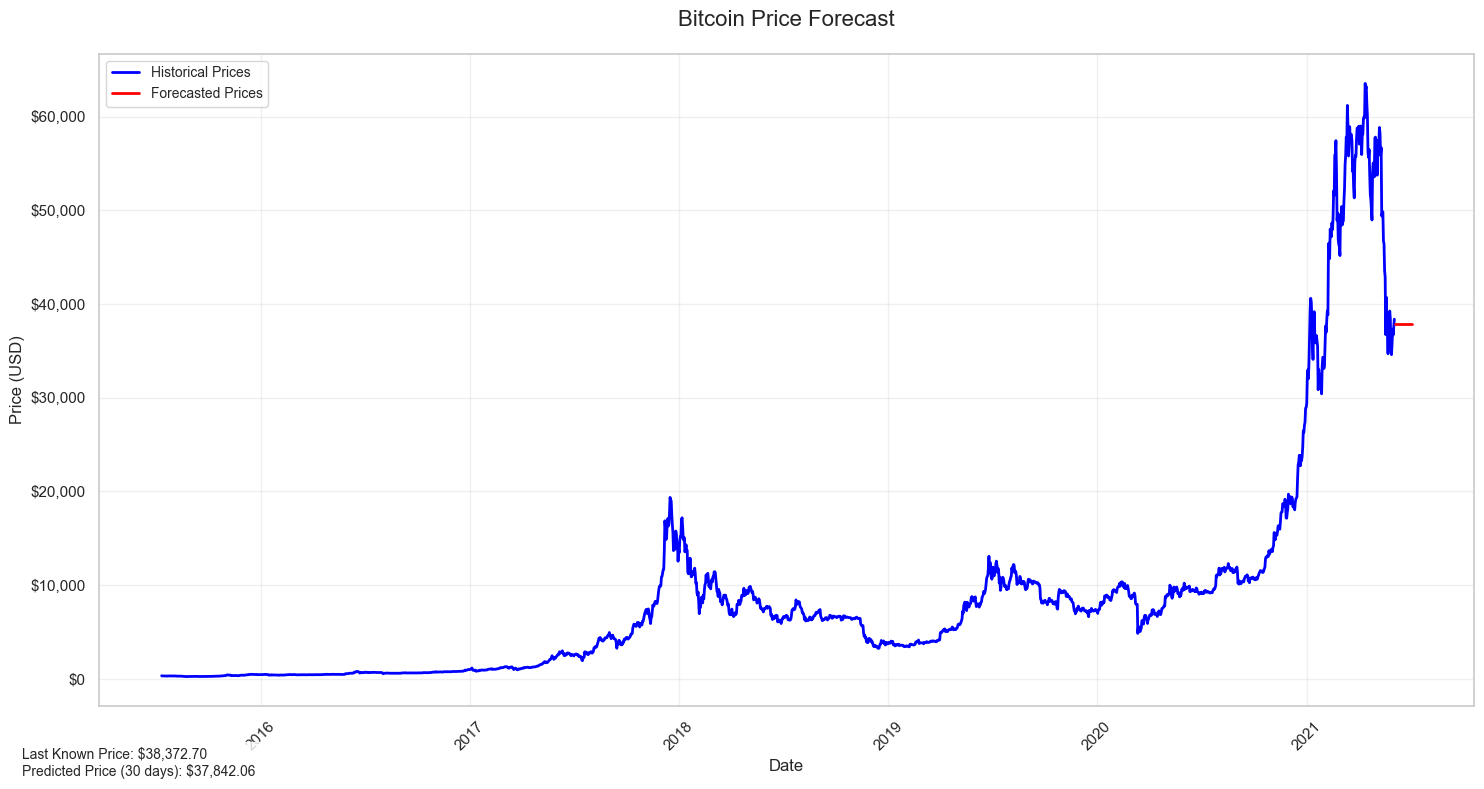


Data Diagnostics:
Training price range:
Min price: $211.40
Max price: $63,540.90
Current price: $38,372.70

Predictions:
30-day prediction: $37,842.06
Prediction change: -1.38%


In [22]:
from sklearn.preprocessing import StandardScaler

# Create scalers
price_scaler = StandardScaler()
feature_scaler = StandardScaler()

# Scale the target (price)
y_scaled = price_scaler.fit_transform(target.values.reshape(-1, 1))

# Scale the features
X_scaled = feature_scaler.fit_transform(features)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Train the model on scaled data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions and inverse transform to get actual prices
y_pred_scaled = model.predict(X_test_scaled)
y_pred_actual = price_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = price_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"Mean Absolute Error: ${mae:,.2f}")

# Generate future predictions
def predict_future_prices(model, last_features, price_scaler, feature_scaler, days=30):
    # Scale the features
    last_features_scaled = feature_scaler.transform(last_features)
    
    # Create future features
    future_features_scaled = np.tile(last_features_scaled, (days, 1))
    
    # Make predictions
    future_pred_scaled = model.predict(future_features_scaled)
    
    # Inverse transform to get actual prices
    future_pred_actual = price_scaler.inverse_transform(
        future_pred_scaled.reshape(-1, 1)
    )
    
    return future_pred_actual.flatten()

# Plot the results
last_date = numerical_data['date'].max()
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Get future predictions
last_features = features.iloc[-1:].copy()
future_predictions = predict_future_prices(
    model, last_features, price_scaler, feature_scaler
)

# Create the plot
plt.figure(figsize=(15, 8))

# Plot historical prices
plt.plot(numerical_data['date'], 
         numerical_data['price'], 
         label='Historical Prices', 
         color='blue', 
         linewidth=2)

# Plot forecasted prices
plt.plot(future_dates, 
         future_predictions, 
         label='Forecasted Prices', 
         color='red', 
         linewidth=2)

# Customize the plot
plt.title('Bitcoin Price Forecast', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Format the y-axis to show prices in USD
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x):,}'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add price information
last_price = numerical_data['price'].iloc[-1]
final_prediction = future_predictions[-1]
summary_text = f'Last Known Price: ${last_price:,.2f}\n'
summary_text += f'Predicted Price (30 days): ${final_prediction:,.2f}'
plt.figtext(0.02, 0.02, summary_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print some diagnostic information
print("\nData Diagnostics:")
print(f"Training price range:")
print(f"Min price: ${numerical_data['price'].min():,.2f}")
print(f"Max price: ${numerical_data['price'].max():,.2f}")
print(f"Current price: ${last_price:,.2f}")
print(f"\nPredictions:")
print(f"30-day prediction: ${final_prediction:,.2f}")
print(f"Prediction change: {((final_prediction - last_price) / last_price * 100):.2f}%")